August: Checking if the child mesh_mask for the no canyon bathymetry was created correctly.

In [4]:
import numpy as np
import netCDF4 as nc
import os
import scipy as sc, scipy.io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from salishsea_tools.nc_tools import scDataset

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot
(cmapmc, norm) = functions_plot.Colormap()
from matplotlib.colors import ListedColormap
cmapmc_r = ListedColormap(cmapmc.colors[::-1])

# Bathymetry: With and without canyon

In [2]:
bathy = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif.nc')['Bathymetry']
bathyn = nc.Dataset('/ocean/imachuca/Canyons/mackenzie_canyon/bathymetry/NEMO_files/idealized/ideal_bathy_for_agrif_nocanyon.nc')['Bathymetry']

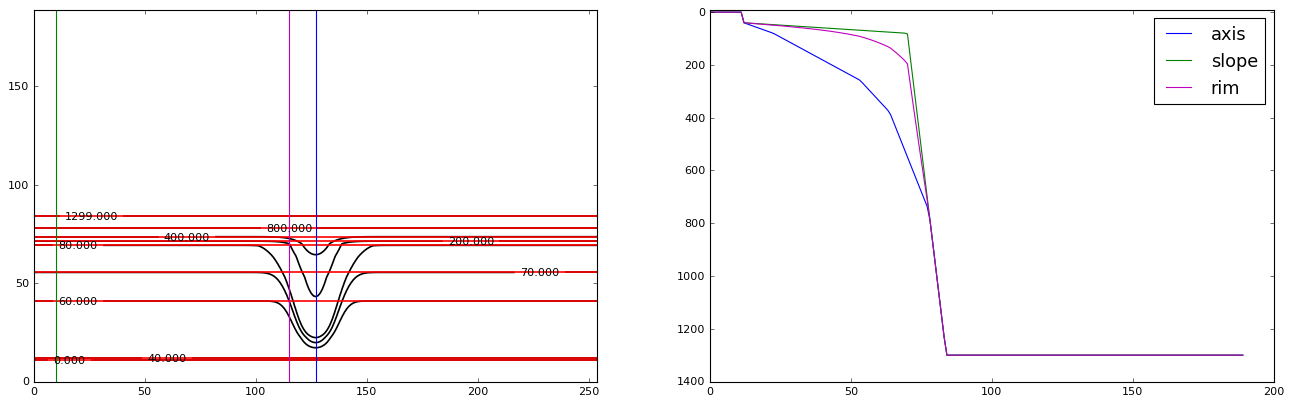

In [3]:
x_axis = int(bathy.shape[-1]*0.5)
x_slope = 10
x_rim = 115

axis = bathy[:, x_axis]
slope = bathy[:, x_slope]
rim = bathy[:, x_rim]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))
c = ax1.contour(bathy[:,:], levels = [0, 40, 60, 70, 80, 200, 400, 800, 1299], colors='k', linewidths=1.5)
cn = ax1.contour(bathyn[:,:], levels = [0, 40, 60, 70, 80, 200, 400, 800, 1299], colors='r', linewidths=1.5)
ax1.axvline(x_axis, c='b')
ax1.axvline(x_slope, c='g')
ax1.axvline(x_rim, c='m')
ax1.clabel(c, inline=1, fontsize=10)

ax2.plot(axis, c='b', label='axis')
ax2.plot(slope, c='g', label='slope')
ax2.plot(rim, c='m', label='rim')
ax2.set_ylim(1400, -10)
ax2.legend(fontsize=16)

** nemo combine mackenzie03_ideal_agrif_nocanyon.yaml**

# Function: Download mesh mask variables

### Also in W_planes_indices.ipynb

In [5]:
def get_variables_planes(dirname, filename):
    with nc.Dataset(os.path.join(dirname, filename), 'r') as nbl:
        x, y =  slice(1,-1,None), slice(1,-1,None)
        gdepw = nbl.variables['gdepw_1d'][0, :]
        tmask = nbl.variables['tmask'][0, :, y, x]
        mbathy = nbl.variables['mbathy'][0, y, x]
        e1t = nbl.variables['e1t'][0, y, x]
        e2t = nbl.variables['e2t'][0, y, x]  
        return gdepw, tmask, mbathy, e1t, e2t

In [6]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/idealized/sbcana_forcings/agrif_wind_timestep/'
filename = '1_mesh_mask.nc'
gdepw, tmask, mbathy, e1t, e2t = get_variables_planes(dirname, filename)
filename = '1_mesh_mask_nocanyon.nc'
gdepwn, tmaskn, mbathyn, e1tn, e2tn = get_variables_planes(dirname, filename)

mbathy.shape, e1t.shape, e2t.shape, tmask.shape

((272, 242), (272, 242), (272, 242), (80, 272, 242))

In [7]:
xs = np.arange(mbathy.shape[-1])
ys = np.arange(mbathy.shape[-2])

# Extracting canyon using mbathy

In [7]:
mbathy_diff = mbathy - mbathyn
mbathy_mask = np.copy(mbathy_diff)
mbathy_mask[mbathy_mask != 0] = 1
mbathy_canyon = mbathy_mask * mbathy
mbathyn_canyon = mbathy_mask * mbathyn

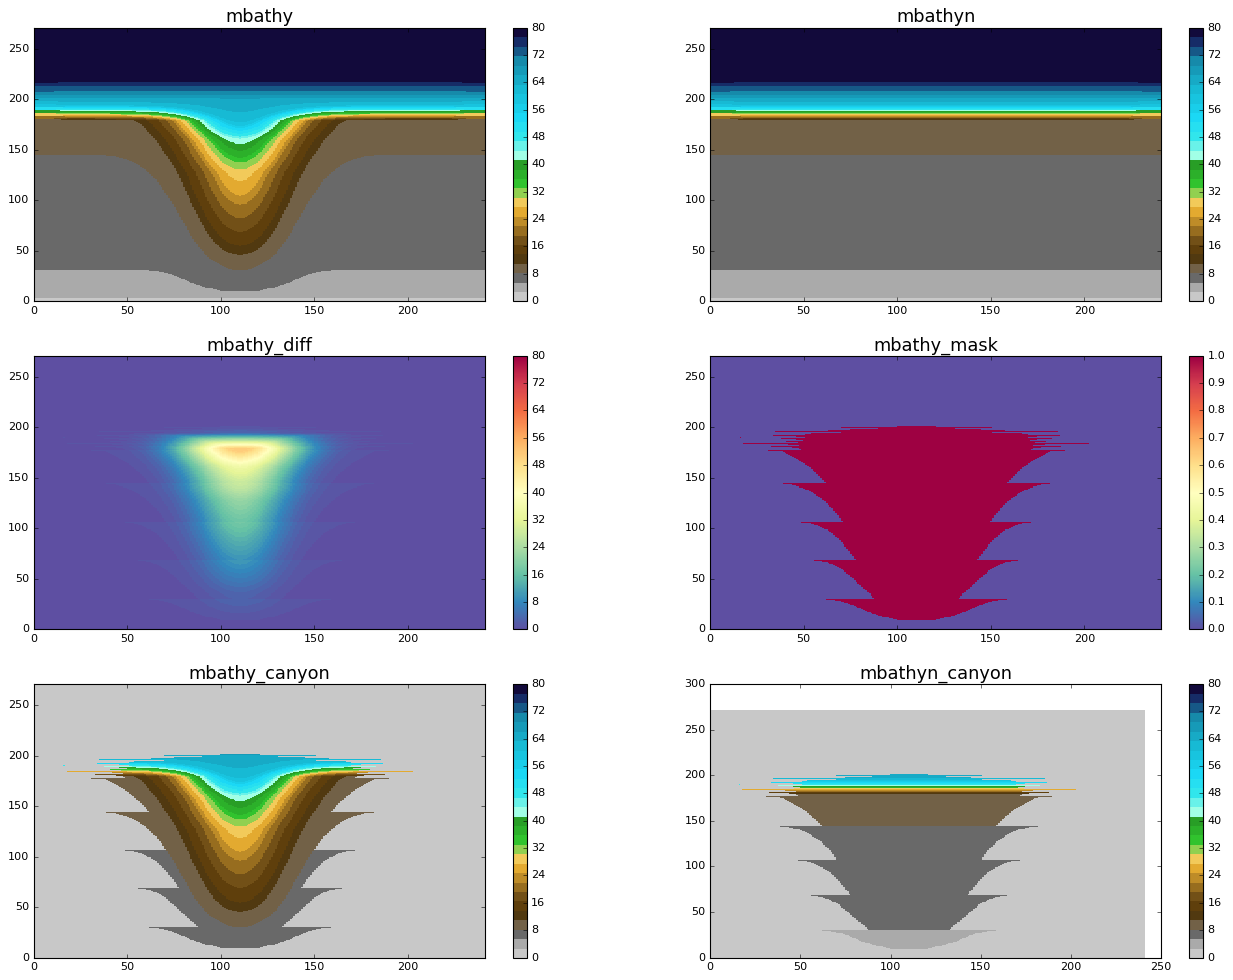

In [8]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3,2,figsize=(20,15))
p1 = ax1.pcolormesh(xs, ys, mbathy, cmap=cmapmc_r, vmin=0, vmax=80)
p2 = ax2.pcolormesh(xs, ys, mbathyn, cmap=cmapmc_r, vmin=0, vmax=80)
p3 = ax3.pcolormesh(xs, ys, mbathy_diff, cmap=cm.Spectral_r, vmin=0, vmax=80)
p4 = ax4.pcolormesh(xs, ys, mbathy_mask, cmap=cm.Spectral_r)
p5 = ax5.pcolormesh(xs, ys, mbathy_canyon, cmap=cmapmc_r, vmin=0, vmax=80)
p6 = ax6.pcolormesh(xs, ys, mbathyn_canyon, cmap=cmapmc_r, vmin=0, vmax=80)

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_xlim(0, xs[-1]); ax.set_ylim(0, ys[-1])

ttls = ['mbathy', 'mbathyn', 'mbathy_diff', 'mbathy_mask', 'mbathy_canyon', 'mbathyn_canyon']
for n, ax, p, ttl in zip(np.arange(6), [ax1, ax2, ax3, ax4, ax5, ax6], [p1,  p2, p3, p4, p5, p6], ttls):
    fig.colorbar(p, ax=ax)
    ax.set_title(ttl, fontsize=16)

# Visualizing in 3D

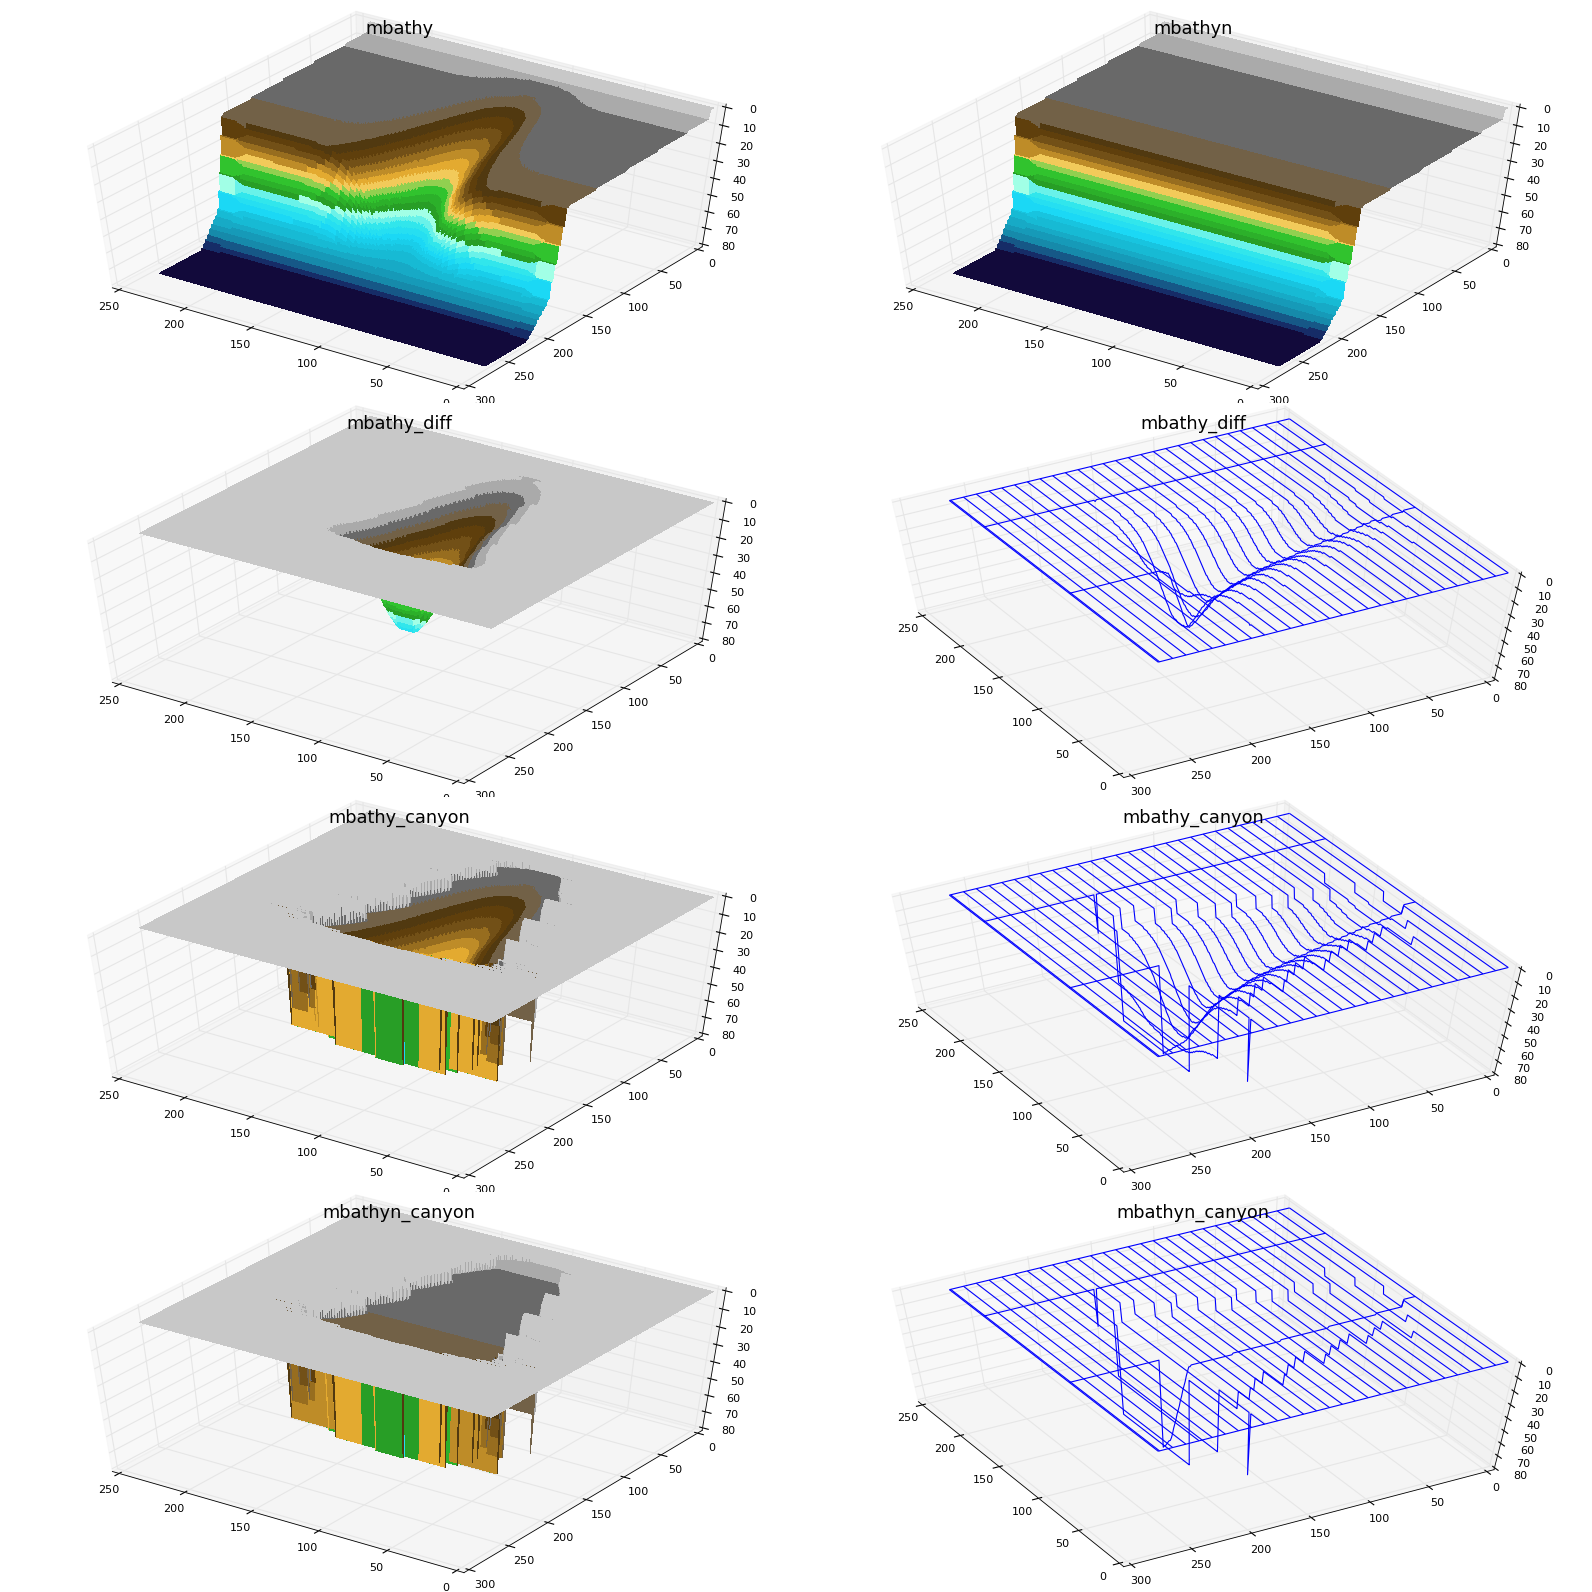

In [9]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(20, 20))
X, Y = np.meshgrid(xs, ys)
n=4
ax1 = fig.add_subplot(n, 2, 1, projection='3d')
ax2 = fig.add_subplot(n, 2, 2, projection='3d')
ax3 = fig.add_subplot(n, 2, 3, projection='3d')
ax4 = fig.add_subplot(n, 2, 4, projection='3d')
ax5 = fig.add_subplot(n, 2, 5, projection='3d')
ax6 = fig.add_subplot(n, 2, 6, projection='3d')
ax7 = fig.add_subplot(n, 2, 7, projection='3d')
ax8 = fig.add_subplot(n, 2, 8, projection='3d')

ttls = ['mbathy', 'mbathyn', 'mbathy_diff', 'mbathy_canyon', 'mbathyn_canyon']
these = [mbathy, mbathyn, mbathy_diff, mbathy_canyon, mbathyn_canyon]
for n, ax, this, ttl in zip(np.arange(5), [ax1, ax2, ax3, ax5, ax7], these, ttls):
    ax.plot_surface(X, Y, this, rstride=1, cstride=1, cmap=cmapmc_r, linewidth=0, antialiased=False, vmin=0, vmax=80)
    ax.set_zlim(80, 0)
    ax.view_init(elev=50, azim=125)
    ax.set_title(ttl, fontsize=16)

ttls = ['mbathy_diff', 'mbathy_canyon', 'mbathyn_canyon']
these = [mbathy_diff, mbathy_canyon, mbathyn_canyon]
for n, ax, this, ttl in zip(np.arange(3), [ax4, ax6, ax8], these, ttls):
    ax.plot_wireframe(X, Y, this, rstride=10, cstride=100)
    ax.set_zlim(80, 0)    
    ax.view_init(elev=60, azim=150)
    ax.set_title(ttl, fontsize=16)
plt.tight_layout(h_pad=0.2)

# Visualizing tmask and mbathy

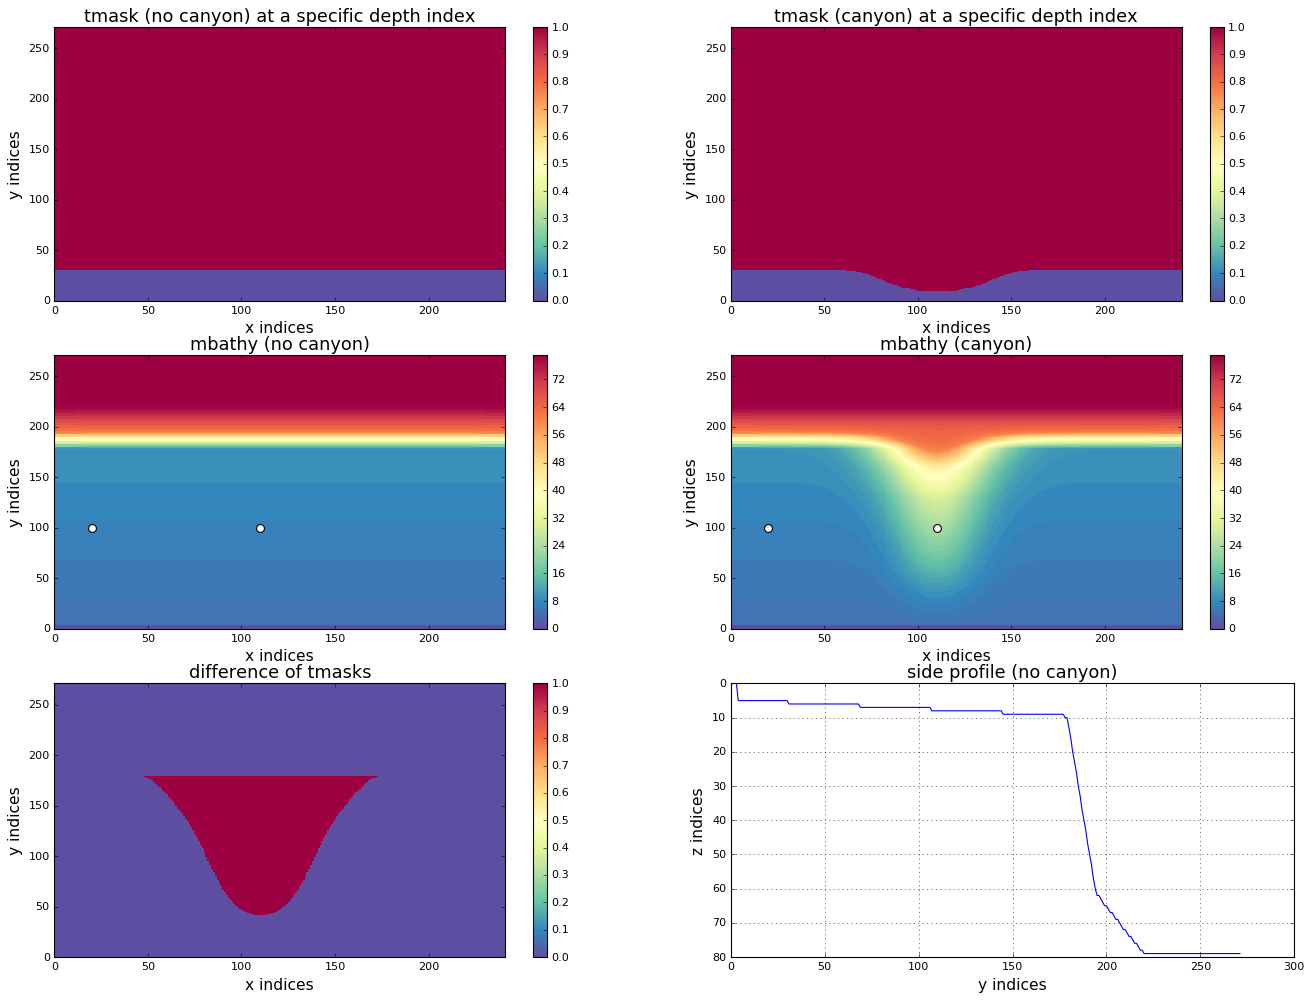

In [31]:
fig, ([ax1, ax2], [ax3, ax4], [ax5, ax6]) = plt.subplots(3,2,figsize=(20,15))
these = [tmaskn[5], tmask[5], mbathyn, mbathy, tmask[10]-tmaskn[10]]
ttls = ['tmask (no canyon) at a specific depth index', 'tmask (canyon) at a specific depth index',
       'mbathy (no canyon)', 'mbathy (canyon)', 'difference of tmasks']
for n, ax, this, ttl in zip (np.arange(5), [ax1, ax2, ax3, ax4, ax5], these, ttls):
    p = ax.pcolormesh(xs, ys, this, cmap=cm.Spectral_r)
    ax.set_xlim(0, xs[-1])
    ax.set_ylim(0, ys[-1])
    fig.colorbar(p, ax=ax)
    ax.set_title(ttl, fontsize=16)
    ax.set_ylabel('y indices', fontsize=14)
    ax.set_xlabel('x indices', fontsize=14)
ax6.plot(mbathyn[:, 100])
ax6.grid()
ax6.invert_yaxis()
ax6.set_title('side profile (no canyon)', fontsize=16)
ax6.set_ylabel('z indices', fontsize=14)
ax6.set_xlabel('y indices', fontsize=14)

wetdry_x, wetdry_y = 20, 100
wetdry_xx, wetdry_yy = 110, 100

for ax in (ax3, ax4):
    ax.scatter(wetdry_x, wetdry_y, s=50, c='w')
    ax.scatter(wetdry_xx, wetdry_yy, s=50, c='w')

In [33]:
z = mbathyn[wetdry_y, wetdry_x]
print('dep ind given by mbathy = ', z)
print('is it wet (1) or dry (0) [no canyon] = ', tmaskn[z, wetdry_y, wetdry_x])
print('is it wet (1) or dry (0) [canyon] = ', tmask[z, wetdry_y, wetdry_x])

zz = mbathyn[wetdry_yy, wetdry_xx]
print('\n dep ind given by mbathy = ', zz)
print('is it wet (1) or dry (0) [no canyon] = ', tmaskn[zz, wetdry_yy, wetdry_xx])
print('is it wet (1) or dry (0) [canyon] = ', tmask[zz, wetdry_yy, wetdry_xx])

dep ind given by mbathy =  7
is it wet (1) or dry (0) [no canyon] =  0
is it wet (1) or dry (0) [canyon] =  0

 dep ind given by mbathy =  7
is it wet (1) or dry (0) [no canyon] =  0
is it wet (1) or dry (0) [canyon] =  1
